# Imports

In [1]:
using DataFrames
using CSV
using MLJ
using Plots
using StatsBase

include("../../lib.jl")

ENV["LINES"]=30;

# Dataset

In [2]:
data = CSV.read("./data.csv")

,1,2,3,4,5,6,7,8,9,10,11
,Float64,Float64,Int64,Int64,Int64,Int64,Int64,Float64,Int64,Int64,Int64
1,3.919,2.6909,0,0,0,0,0,31.4,2,0,0
2,4.17,2.1144,0,0,0,0,0,30.8,1,1,0
3,3.932,3.2512,0,0,0,0,0,26.7,2,4,0
4,3.0,2.7098,0,0,0,0,0,20.0,0,2,0
5,4.236,3.3944,0,0,0,0,0,29.4,2,4,0
6,4.236,3.4286,0,0,0,0,0,28.6,2,4,0
7,5.0,5.0476,1,0,0,0,0,11.1,0,3,0
8,4.525,3.8301,0,0,0,0,0,31.6,3,2,0
9,4.596,3.0777,0,0,0,0,2,44.4,2,0,0


In [3]:
describe(data)

,variable,mean,min,median,max,nunique,nmissing,eltype
,Symbol,Union…,Any,Union…,Any,Union…,Nothing,DataType
1,1,4.78264,2.0,4.828,6.496,,,Float64
2,2,3.06951,0.8039,3.0463,9.1775,,,Float64
3,3,0.716588,0,0.0,12,,,Int64
4,4,0.042654,0,0.0,3,,,Int64
5,5,0.980095,0,0.0,36,,,Int64
6,6,0.290047,0,0.0,13,,,Int64
7,7,1.64645,0,1.0,18,,,Int64
8,8,37.0556,0.0,37.5,60.7,,,Float64
9,9,1.3763,0,1.0,24,,,Int64


Look at class labels to see if dataset is imbalanced

In [4]:
label_counts = countmap(data[:(Class)])

Dict{String,Int64} with 2 entries:
  "RB"  => 356
  "NRB" => 699

In [5]:
collect(label_counts[i] / size(data)[1] for i in keys(label_counts))

2-element Array{Float64,1}:
 0.33744075829383885
 0.6625592417061611

Get data ready for training

In [6]:
coerce!(data, :Class=>Multiclass)
schema(data)

┌─────────┬─────────────────────────────────┬───────────────┐
│ _.names │ _.types                         │ _.scitypes    │
├─────────┼─────────────────────────────────┼───────────────┤
│ 1       │ Float64                         │ Continuous    │
│ 2       │ Float64                         │ Continuous    │
│ 3       │ Int64                           │ Count         │
│ 4       │ Int64                           │ Count         │
│ 5       │ Int64                           │ Count         │
│ 6       │ Int64                           │ Count         │
│ 7       │ Int64                           │ Count         │
│ 8       │ Float64                         │ Continuous    │
│ 9       │ Int64                           │ Count         │
│ 10      │ Int64                           │ Count         │
│ 11      │ Int64                           │ Count         │
│ 12      │ Float64                         │ Continuous    │
│ 13      │ Float64                         │ Continuous    │
│ 14    

In [7]:
y, X = unpack(data, ==(:Class), colname->true)

(CategoricalValue{String,UInt32}["RB", "RB", "RB", "RB", "RB", "RB", "RB", "RB", "RB", "RB"  …  "NRB", "NRB", "NRB", "NRB", "NRB", "NRB", "NRB", "NRB", "NRB", "NRB"], 1055×41 DataFrame. Omitted printing of 33 columns
│ Row  │ 1       │ 2       │ 3     │ 4     │ 5     │ 6     │ 7     │ 8       │
│      │ Float64 │ Float64 │ Int64 │ Int64 │ Int64 │ Int64 │ Int64 │ Float64 │
├──────┼─────────┼─────────┼───────┼───────┼───────┼───────┼───────┼─────────┤
│ 1    │ 3.919   │ 2.6909  │ 0     │ 0     │ 0     │ 0     │ 0     │ 31.4    │
│ 2    │ 4.17    │ 2.1144  │ 0     │ 0     │ 0     │ 0     │ 0     │ 30.8    │
│ 3    │ 3.932   │ 3.2512  │ 0     │ 0     │ 0     │ 0     │ 0     │ 26.7    │
│ 4    │ 3.0     │ 2.7098  │ 0     │ 0     │ 0     │ 0     │ 0     │ 20.0    │
│ 5    │ 4.236   │ 3.3944  │ 0     │ 0     │ 0     │ 0     │ 0     │ 29.4    │
│ 6    │ 4.236   │ 3.4286  │ 0     │ 0     │ 0     │ 0     │ 0     │ 28.6    │
│ 7    │ 5.0     │ 5.0476  │ 1     │ 0     │ 0     │ 0     │ 0     │ 11.

Partition train and test data accoring to class labels

In [8]:
# data to use when trying to fit a single validation set
train, test = partition(eachindex(y), 0.7, shuffle=true, rng=123, stratify=values(data[:Class])) # gives 70:30 split

([465, 562, 278, 619, 161, 972, 782, 321, 537, 760  …  12, 913, 471, 13, 1006, 802, 112, 840, 744, 261], [196, 586, 245, 77, 1028, 432, 215, 987, 137, 411  …  975, 610, 886, 848, 731, 1024, 805, 500, 659, 415])

In [9]:
train_counts = countmap(data[train,:Class])
collect(train_counts[i] / size(train)[1] for i in keys(train_counts))

2-element Array{Float64,1}:
 0.33739837398373984
 0.6626016260162602

In [10]:
test_counts = countmap(data[test,:Class])
collect(test_counts[i] / size(test)[1] for i in keys(test_counts))

2-element Array{Float64,1}:
 0.33753943217665616
 0.6624605678233438

In [11]:
standardizer = Standardizer()
stand = machine(standardizer, X_stand[train,:]) #only want to standardize on training distribution
fit!(stand)
X_stand = MLJ.transform(stand, X);

┌ Info: Training Machine{Standardizer} @657.
└ @ MLJBase /home/andrew/.julia/packages/MLJBase/uKzAz/src/machines.jl:319


# Five Learning Algorithms

* Decision trees with some form of pruning
* Neural networks
* Boosting
* Support Vector Machines
* k-nearest neighbors


##### Testing
* Implement the algorithms
* Design two *interesting* classification problems. For the purposes of this assignment, a classification problem is just a set of training examples and a set of test examples.

In [23]:
models(matching(X,y))

6-element Array{NamedTuple{(:name, :package_name, :is_supervised, :docstring, :hyperparameter_ranges, :hyperparameter_types, :hyperparameters, :implemented_methods, :is_pure_julia, :is_wrapper, :load_path, :package_license, :package_url, :package_uuid, :prediction_type, :supports_online, :supports_weights, :input_scitype, :target_scitype, :output_scitype),T} where T<:Tuple,1}:
 (name = AdaBoostStumpClassifier, package_name = DecisionTree, ... )
 (name = ConstantClassifier, package_name = MLJModels, ... )
 (name = DecisionTreeClassifier, package_name = DecisionTree, ... )
 (name = DeterministicConstantClassifier, package_name = MLJModels, ... )
 (name = RandomForestClassifier, package_name = DecisionTree, ... )
 (name = RandomForestClassifier, package_name = ScikitLearn, ... )

In [13]:
@load AdaBoostClassifier verbosity=2

import MLJScikitLearnInterface 

┌ Info: Loading into module "Main": 
└ @ MLJModels /home/andrew/.julia/packages/MLJModels/mUBFt/src/loading.jl:70


✔
import MLJScikitLearnInterface ✔


AdaBoostClassifier(
    base_estimator = nothing,
    n_estimators = 50,
    learning_rate = 1.0,
    algorithm = "SAMME.R",
    random_state = nothing) @124

### Boosting
* Implement or steal a boosted version of your decision trees. 
* As before, you will want to use some form of pruning, but presumably because you're using boosting you can afford to be much more aggressive about your pruning.

**Chooses the hardest examples** talk about in write-up

In [44]:
boost_model = AdaBoostClassifier(verbosity=1)

LoadError: MethodError: no method matching MLJScikitLearnInterface.AdaBoostClassifier(; verbosity=1)
Closest candidates are:
  MLJScikitLearnInterface.AdaBoostClassifier(; base_estimator, n_estimators, learning_rate, algorithm, random_state) at none:0 got unsupported keyword argument "verbosity"

In [45]:
boost_mach = machine(boost_model, X_stand, y)

┌ Warning: The scitype of `X`, in `machine(model, X, ...)` is incompatible with `model=AdaBoostClassifier @872`:
│ scitype(X) = Table{Union{AbstractArray{Continuous,1}, AbstractArray{Count,1}}}
│ input_scitype(model) = Table{var"#s44"} where var"#s44"<:(AbstractArray{var"#s13",1} where var"#s13"<:Continuous).
└ @ MLJBase /home/andrew/.julia/packages/MLJBase/uKzAz/src/machines.jl:77


Machine{AdaBoostClassifier} @626 trained 0 times.
  args: 
    1:	Source @819 ⏎ `Table{Union{AbstractArray{Continuous,1}, AbstractArray{Count,1}}}`
    2:	Source @009 ⏎ `AbstractArray{Multiclass{2},1}`


In [46]:
fit!(boost_mach, rows=train, verbosity=2)

┌ Info: Training Machine{AdaBoostClassifier} @626.
└ @ MLJBase /home/andrew/.julia/packages/MLJBase/uKzAz/src/machines.jl:319


Machine{AdaBoostClassifier} @626 trained 1 time.
  args: 
    1:	Source @819 ⏎ `Table{Union{AbstractArray{Continuous,1}, AbstractArray{Count,1}}}`
    2:	Source @009 ⏎ `AbstractArray{Multiclass{2},1}`


In [47]:
boost_acc = evaluate!(boost_mach, resampling=CV(shuffle=true), measure=[cross_entropy, acc], 
                      verbosity=1, check_measure=false)

Evaluating over 6 folds: 100%[=========================] Time: 0:00:00


┌───────────────┬───────────────┬───────────────────────────────────────────┐
│ _.measure     │ _.measurement │ _.per_fold                                │
├───────────────┼───────────────┼───────────────────────────────────────────┤
│ cross_entropy │ 0.633         │ [0.629, 0.63, 0.641, 0.638, 0.621, 0.642] │
│ acc           │ 0.846         │ [0.852, 0.875, 0.83, 0.824, 0.835, 0.863] │
└───────────────┴───────────────┴───────────────────────────────────────────┘
_.per_observation = [[[0.675, 0.614, ..., 0.686], [0.723, 0.613, ..., 0.652], [0.584, 0.61, ..., 0.643], [0.648, 0.663, ..., 0.271], [0.708, 0.508, ..., 0.7], [0.68, 0.653, ..., 0.639]], missing]
_.fitted_params_per_fold = [ … ]
_.report_per_fold = [ … ]


In [48]:
# evaluate!(boost_mach, resampling=CV(shuffle=true), measure=[tnr,tpr,fnr,fpr], verbosity=1, operation=predict_mode)

In [49]:
fitted_params(boost_mach);

### GridSearch 
number of estimators vs learning rate

In [50]:
param1 = :learning_rate
param2 = :n_estimators

r1 = range(boost_model, param1, lower=0.001, upper=10, scale=:log10)
r2 = range(boost_model, param2, lower=1, upper=1000, scale=:log10)

MLJBase.NumericRange(Int64, :n_estimators, ... )

In [51]:
self_tuning_boost_model = TunedModel(model=boost_model,
                                    tuning=Grid(),
                                    resampling=CV(), 
                                    measure=cross_entropy,
                                    acceleration=CPUThreads(),
                                    range=[r1, r2])

ProbabilisticTunedModel(
    model = AdaBoostClassifier(
            base_estimator = nothing,
            n_estimators = 50,
            learning_rate = 1.0,
            algorithm = "SAMME.R",
            random_state = nothing),
    tuning = Grid(
            goal = nothing,
            resolution = 10,
            shuffle = true,
            rng = Random._GLOBAL_RNG()),
    resampling = CV(
            nfolds = 6,
            shuffle = false,
            rng = Random._GLOBAL_RNG()),
    measure = cross_entropy(
            eps = 2.220446049250313e-16),
    weights = nothing,
    operation = MLJModelInterface.predict,
    range = MLJBase.NumericRange{T,MLJBase.Bounded,Symbol} where T[NumericRange{Float64,…} @615, NumericRange{Int64,…} @099],
    train_best = true,
    repeats = 1,
    n = nothing,
    acceleration = CPUThreads{Int64}(1),
    acceleration_resampling = CPU1{Nothing}(nothing),
    check_measure = true) @196

In [52]:
self_tuning_boost = machine(self_tuning_boost_model, X_stand, y)

┌ Warning: The scitype of `X`, in `machine(model, X, ...)` is incompatible with `model=ProbabilisticTunedModel{Grid,…} @196`:
│ scitype(X) = Table{Union{AbstractArray{Continuous,1}, AbstractArray{Count,1}}}
│ input_scitype(model) = Table{var"#s44"} where var"#s44"<:(AbstractArray{var"#s13",1} where var"#s13"<:Continuous).
└ @ MLJBase /home/andrew/.julia/packages/MLJBase/uKzAz/src/machines.jl:77


Machine{ProbabilisticTunedModel{Grid,…}} @275 trained 0 times.
  args: 
    1:	Source @398 ⏎ `Table{Union{AbstractArray{Continuous,1}, AbstractArray{Count,1}}}`
    2:	Source @859 ⏎ `AbstractArray{Multiclass{2},1}`


In [53]:
z = fit!(self_tuning_boost, rows=train)

┌ Info: Training Machine{ProbabilisticTunedModel{Grid,…}} @275.
└ @ MLJBase /home/andrew/.julia/packages/MLJBase/uKzAz/src/machines.jl:319
┌ Info: Attempting to evaluate 100 models.
└ @ MLJTuning /home/andrew/.julia/packages/MLJTuning/Bbgvk/src/tuned_models.jl:494
┌ Warning: The scitype of `X`, in `machine(model, X, ...)` is incompatible with `model=Resampler{CV,…} @375`:
│ scitype(X) = Table{Union{AbstractArray{Continuous,1}, AbstractArray{Count,1}}}
│ input_scitype(model) = Table{var"#s44"} where var"#s44"<:(AbstractArray{var"#s13",1} where var"#s13"<:Continuous).
└ @ MLJBase /home/andrew/.julia/packages/MLJBase/uKzAz/src/machines.jl:77
Evaluating over 100 metamodels:   0%[>                        ]  ETA: N/A┌ Warning: The scitype of `X`, in `machine(model, X, ...)` is incompatible with `model=AdaBoostClassifier @827`:
│ scitype(X) = Table{Union{AbstractArray{Continuous,1}, AbstractArray{Count,1}}}
│ input_scitype(model) = Table{var"#s44"} where var"#s44"<:(AbstractArray{var"#s13",1}

Evaluating over 100 metamodels:  16%[====>                    ]  ETA: 0:01:37┌ Warning: The scitype of `X`, in `machine(model, X, ...)` is incompatible with `model=AdaBoostClassifier @587`:
│ scitype(X) = Table{Union{AbstractArray{Continuous,1}, AbstractArray{Count,1}}}
│ input_scitype(model) = Table{var"#s44"} where var"#s44"<:(AbstractArray{var"#s13",1} where var"#s13"<:Continuous).
└ @ MLJBase /home/andrew/.julia/packages/MLJBase/uKzAz/src/machines.jl:77
Evaluating over 100 metamodels:  17%[====>                    ]  ETA: 0:01:31┌ Warning: The scitype of `X`, in `machine(model, X, ...)` is incompatible with `model=AdaBoostClassifier @818`:
│ scitype(X) = Table{Union{AbstractArray{Continuous,1}, AbstractArray{Count,1}}}
│ input_scitype(model) = Table{var"#s44"} where var"#s44"<:(AbstractArray{var"#s13",1} where var"#s13"<:Continuous).
└ @ MLJBase /home/andrew/.julia/packages/MLJBase/uKzAz/src/machines.jl:77
Evaluating over 100 metamodels:  18%[====>                    ]  ETA: 0:01:2

Evaluating over 100 metamodels:  33%[========>                ]  ETA: 0:01:22┌ Warning: The scitype of `X`, in `machine(model, X, ...)` is incompatible with `model=AdaBoostClassifier @706`:
│ scitype(X) = Table{Union{AbstractArray{Continuous,1}, AbstractArray{Count,1}}}
│ input_scitype(model) = Table{var"#s44"} where var"#s44"<:(AbstractArray{var"#s13",1} where var"#s13"<:Continuous).
└ @ MLJBase /home/andrew/.julia/packages/MLJBase/uKzAz/src/machines.jl:77
Evaluating over 100 metamodels:  34%[========>                ]  ETA: 0:01:26┌ Warning: The scitype of `X`, in `machine(model, X, ...)` is incompatible with `model=AdaBoostClassifier @910`:
│ scitype(X) = Table{Union{AbstractArray{Continuous,1}, AbstractArray{Count,1}}}
│ input_scitype(model) = Table{var"#s44"} where var"#s44"<:(AbstractArray{var"#s13",1} where var"#s13"<:Continuous).
└ @ MLJBase /home/andrew/.julia/packages/MLJBase/uKzAz/src/machines.jl:77
Evaluating over 100 metamodels:  35%[========>                ]  ETA: 0:01:2

Evaluating over 100 metamodels:  50%[============>            ]  ETA: 0:01:17┌ Warning: The scitype of `X`, in `machine(model, X, ...)` is incompatible with `model=AdaBoostClassifier @185`:
│ scitype(X) = Table{Union{AbstractArray{Continuous,1}, AbstractArray{Count,1}}}
│ input_scitype(model) = Table{var"#s44"} where var"#s44"<:(AbstractArray{var"#s13",1} where var"#s13"<:Continuous).
└ @ MLJBase /home/andrew/.julia/packages/MLJBase/uKzAz/src/machines.jl:77
Evaluating over 100 metamodels:  51%[============>            ]  ETA: 0:01:27┌ Warning: The scitype of `X`, in `machine(model, X, ...)` is incompatible with `model=AdaBoostClassifier @938`:
│ scitype(X) = Table{Union{AbstractArray{Continuous,1}, AbstractArray{Count,1}}}
│ input_scitype(model) = Table{var"#s44"} where var"#s44"<:(AbstractArray{var"#s13",1} where var"#s13"<:Continuous).
└ @ MLJBase /home/andrew/.julia/packages/MLJBase/uKzAz/src/machines.jl:77
Evaluating over 100 metamodels:  52%[=============>           ]  ETA: 0:01:2

Evaluating over 100 metamodels:  67%[================>        ]  ETA: 0:01:03┌ Warning: The scitype of `X`, in `machine(model, X, ...)` is incompatible with `model=AdaBoostClassifier @069`:
│ scitype(X) = Table{Union{AbstractArray{Continuous,1}, AbstractArray{Count,1}}}
│ input_scitype(model) = Table{var"#s44"} where var"#s44"<:(AbstractArray{var"#s13",1} where var"#s13"<:Continuous).
└ @ MLJBase /home/andrew/.julia/packages/MLJBase/uKzAz/src/machines.jl:77
Evaluating over 100 metamodels:  68%[=================>       ]  ETA: 0:01:01┌ Warning: The scitype of `X`, in `machine(model, X, ...)` is incompatible with `model=AdaBoostClassifier @374`:
│ scitype(X) = Table{Union{AbstractArray{Continuous,1}, AbstractArray{Count,1}}}
│ input_scitype(model) = Table{var"#s44"} where var"#s44"<:(AbstractArray{var"#s13",1} where var"#s13"<:Continuous).
└ @ MLJBase /home/andrew/.julia/packages/MLJBase/uKzAz/src/machines.jl:77
Evaluating over 100 metamodels:  69%[=================>       ]  ETA: 0:00:5

Evaluating over 100 metamodels:  84%[=====================>   ]  ETA: 0:00:32┌ Warning: The scitype of `X`, in `machine(model, X, ...)` is incompatible with `model=AdaBoostClassifier @789`:
│ scitype(X) = Table{Union{AbstractArray{Continuous,1}, AbstractArray{Count,1}}}
│ input_scitype(model) = Table{var"#s44"} where var"#s44"<:(AbstractArray{var"#s13",1} where var"#s13"<:Continuous).
└ @ MLJBase /home/andrew/.julia/packages/MLJBase/uKzAz/src/machines.jl:77
Evaluating over 100 metamodels:  85%[=====================>   ]  ETA: 0:00:30┌ Warning: The scitype of `X`, in `machine(model, X, ...)` is incompatible with `model=AdaBoostClassifier @420`:
│ scitype(X) = Table{Union{AbstractArray{Continuous,1}, AbstractArray{Count,1}}}
│ input_scitype(model) = Table{var"#s44"} where var"#s44"<:(AbstractArray{var"#s13",1} where var"#s13"<:Continuous).
└ @ MLJBase /home/andrew/.julia/packages/MLJBase/uKzAz/src/machines.jl:77
Evaluating over 100 metamodels:  86%[=====================>   ]  ETA: 0:00:2

Machine{ProbabilisticTunedModel{Grid,…}} @275 trained 1 time.
  args: 
    1:	Source @398 ⏎ `Table{Union{AbstractArray{Continuous,1}, AbstractArray{Count,1}}}`
    2:	Source @859 ⏎ `AbstractArray{Multiclass{2},1}`


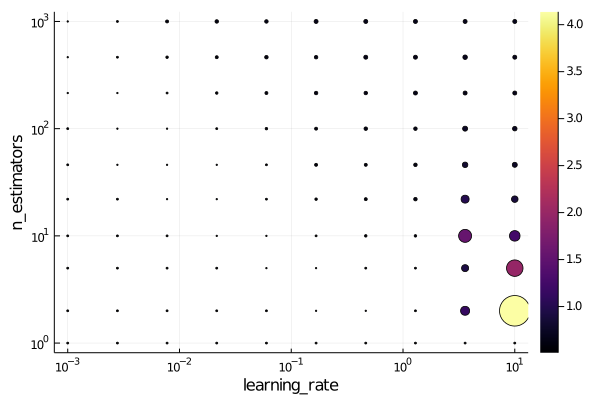

In [54]:
plot(self_tuning_boost)

In [55]:
best = fitted_params(self_tuning_boost)
best.best_model

AdaBoostClassifier(
    base_estimator = nothing,
    n_estimators = 5,
    learning_rate = 0.16681005372000587,
    algorithm = "SAMME.R",
    random_state = nothing) @456

In [56]:
best_loss = round(z.report.best_result.measurement[1],digits=5)

0.50868

In [57]:
best_n = best.best_model.n_estimators
best_lr = best.best_model.learning_rate

0.16681005372000587

In [58]:
fn = "Figures/LearningCurve_Boost_nestimators:$(best_n)_lr:$(best_lr)_loss:$(best_loss)"
png(replace(fn,'.' => ','))

### Learning Curves

In [63]:
data_schedule, training_losses, valid_losses = learn_curve(best.best_model, X_stand[train,:], y[train], acc)

(d, train_metric, valid_metric) = (10, 1.0, 0.6283783783783784)
(d, train_metric, valid_metric) = (15, 1.0, 0.6283783783783784)
(d, train_metric, valid_metric) = (20, 1.0, 0.7635135135135135)
(d, train_metric, valid_metric) = (25, 1.0, 0.7432432432432432)
(d, train_metric, valid_metric) = (30, 1.0, 0.7432432432432432)


┌ Warning: The scitype of `X`, in `machine(model, X, ...)` is incompatible with `model=AdaBoostClassifier @456`:
│ scitype(X) = Table{Union{AbstractArray{Continuous,1}, AbstractArray{Count,1}}}
│ input_scitype(model) = Table{var"#s44"} where var"#s44"<:(AbstractArray{var"#s13",1} where var"#s13"<:Continuous).
└ @ MLJBase /home/andrew/.julia/packages/MLJBase/uKzAz/src/machines.jl:77
┌ Warning: The scitype of `X`, in `machine(model, X, ...)` is incompatible with `model=AdaBoostClassifier @456`:
│ scitype(X) = Table{Union{AbstractArray{Continuous,1}, AbstractArray{Count,1}}}
│ input_scitype(model) = Table{var"#s44"} where var"#s44"<:(AbstractArray{var"#s13",1} where var"#s13"<:Continuous).
└ @ MLJBase /home/andrew/.julia/packages/MLJBase/uKzAz/src/machines.jl:77
┌ Warning: The scitype of `X`, in `machine(model, X, ...)` is incompatible with `model=AdaBoostClassifier @456`:
│ scitype(X) = Table{Union{AbstractArray{Continuous,1}, AbstractArray{Count,1}}}
│ input_scitype(model) = Table{var"#

(d, train_metric, valid_metric) = (35, 0.9428571428571428, 0.7905405405405406)
(d, train_metric, valid_metric) = (40, 0.95, 0.7905405405405406)
(d, train_metric, valid_metric) = (45, 0.9333333333333333, 0.7567567567567568)
(d, train_metric, valid_metric) = (50, 0.9, 0.75)
(d, train_metric, valid_metric) = (55, 0.9090909090909091, 0.8175675675675675)
(d, train_metric, valid_metric) = (60, 0.8833333333333333, 0.7972972972972973)
(d, train_metric, valid_metric) = (65, 0.8923076923076924, 0.7972972972972973)
(d, train_metric, valid_metric) = (70, 0.8571428571428571, 0.7162162162162162)
(d, train_metric, valid_metric) = (75, 0.8266666666666667, 0.7905405405405406)


┌ Warning: The scitype of `X`, in `machine(model, X, ...)` is incompatible with `model=AdaBoostClassifier @456`:
│ scitype(X) = Table{Union{AbstractArray{Continuous,1}, AbstractArray{Count,1}}}
│ input_scitype(model) = Table{var"#s44"} where var"#s44"<:(AbstractArray{var"#s13",1} where var"#s13"<:Continuous).
└ @ MLJBase /home/andrew/.julia/packages/MLJBase/uKzAz/src/machines.jl:77
┌ Warning: The scitype of `X`, in `machine(model, X, ...)` is incompatible with `model=AdaBoostClassifier @456`:
│ scitype(X) = Table{Union{AbstractArray{Continuous,1}, AbstractArray{Count,1}}}
│ input_scitype(model) = Table{var"#s44"} where var"#s44"<:(AbstractArray{var"#s13",1} where var"#s13"<:Continuous).
└ @ MLJBase /home/andrew/.julia/packages/MLJBase/uKzAz/src/machines.jl:77
┌ Warning: The scitype of `X`, in `machine(model, X, ...)` is incompatible with `model=AdaBoostClassifier @456`:
│ scitype(X) = Table{Union{AbstractArray{Continuous,1}, AbstractArray{Count,1}}}
│ input_scitype(model) = Table{var"#

(d, train_metric, valid_metric) = (80, 0.825, 0.8040540540540541)
(d, train_metric, valid_metric) = (85, 0.8470588235294118, 0.7837837837837838)
(d, train_metric, valid_metric) = (90, 0.7888888888888889, 0.7972972972972973)
(d, train_metric, valid_metric) = (95, 0.8105263157894737, 0.7972972972972973)
(d, train_metric, valid_metric) = (100, 0.79, 0.7972972972972973)
(d, train_metric, valid_metric) = (105, 0.7904761904761904, 0.7972972972972973)
(d, train_metric, valid_metric) = (110, 0.8181818181818182, 0.7905405405405406)
(d, train_metric, valid_metric) = (115, 0.808695652173913, 0.7905405405405406)
(d, train_metric, valid_metric) = (120, 0.8, 0.7905405405405406)
(d, train_metric, valid_metric) = (125, 0.8, 0.7905405405405406)
(d, train_metric, valid_metric) = (130, 0.8076923076923077, 0.7905405405405406)


┌ Warning: The scitype of `X`, in `machine(model, X, ...)` is incompatible with `model=AdaBoostClassifier @456`:
│ scitype(X) = Table{Union{AbstractArray{Continuous,1}, AbstractArray{Count,1}}}
│ input_scitype(model) = Table{var"#s44"} where var"#s44"<:(AbstractArray{var"#s13",1} where var"#s13"<:Continuous).
└ @ MLJBase /home/andrew/.julia/packages/MLJBase/uKzAz/src/machines.jl:77
┌ Warning: The scitype of `X`, in `machine(model, X, ...)` is incompatible with `model=AdaBoostClassifier @456`:
│ scitype(X) = Table{Union{AbstractArray{Continuous,1}, AbstractArray{Count,1}}}
│ input_scitype(model) = Table{var"#s44"} where var"#s44"<:(AbstractArray{var"#s13",1} where var"#s13"<:Continuous).
└ @ MLJBase /home/andrew/.julia/packages/MLJBase/uKzAz/src/machines.jl:77
┌ Warning: The scitype of `X`, in `machine(model, X, ...)` is incompatible with `model=AdaBoostClassifier @456`:
│ scitype(X) = Table{Union{AbstractArray{Continuous,1}, AbstractArray{Count,1}}}
│ input_scitype(model) = Table{var"#

(d, train_metric, valid_metric) = (135, 0.8074074074074075, 0.7905405405405406)
(d, train_metric, valid_metric) = (140, 0.8071428571428572, 0.7905405405405406)
(d, train_metric, valid_metric) = (145, 0.8137931034482758, 0.7905405405405406)
(d, train_metric, valid_metric) = (150, 0.8133333333333334, 0.7972972972972973)
(d, train_metric, valid_metric) = (155, 0.8129032258064516, 0.7972972972972973)
(d, train_metric, valid_metric) = (160, 0.8125, 0.7905405405405406)
(d, train_metric, valid_metric) = (165, 0.8121212121212121, 0.7905405405405406)
(d, train_metric, valid_metric) = (170, 0.8117647058823529, 0.7837837837837838)
(d, train_metric, valid_metric) = (175, 0.8, 0.7905405405405406)
(d, train_metric, valid_metric) = (180, 0.8, 0.7905405405405406)


┌ Warning: The scitype of `X`, in `machine(model, X, ...)` is incompatible with `model=AdaBoostClassifier @456`:
│ scitype(X) = Table{Union{AbstractArray{Continuous,1}, AbstractArray{Count,1}}}
│ input_scitype(model) = Table{var"#s44"} where var"#s44"<:(AbstractArray{var"#s13",1} where var"#s13"<:Continuous).
└ @ MLJBase /home/andrew/.julia/packages/MLJBase/uKzAz/src/machines.jl:77
┌ Warning: The scitype of `X`, in `machine(model, X, ...)` is incompatible with `model=AdaBoostClassifier @456`:
│ scitype(X) = Table{Union{AbstractArray{Continuous,1}, AbstractArray{Count,1}}}
│ input_scitype(model) = Table{var"#s44"} where var"#s44"<:(AbstractArray{var"#s13",1} where var"#s13"<:Continuous).
└ @ MLJBase /home/andrew/.julia/packages/MLJBase/uKzAz/src/machines.jl:77
┌ Warning: The scitype of `X`, in `machine(model, X, ...)` is incompatible with `model=AdaBoostClassifier @456`:
│ scitype(X) = Table{Union{AbstractArray{Continuous,1}, AbstractArray{Count,1}}}
│ input_scitype(model) = Table{var"#

(d, train_metric, valid_metric) = (185, 0.8054054054054054, 0.7905405405405406)
(d, train_metric, valid_metric) = (190, 0.7947368421052632, 0.7905405405405406)
(d, train_metric, valid_metric) = (195, 0.8102564102564103, 0.7905405405405406)
(d, train_metric, valid_metric) = (200, 0.815, 0.7905405405405406)
(d, train_metric, valid_metric) = (205, 0.8195121951219512, 0.7837837837837838)
(d, train_metric, valid_metric) = (210, 0.819047619047619, 0.7837837837837838)
(d, train_metric, valid_metric) = (215, 0.8046511627906977, 0.7972972972972973)
(d, train_metric, valid_metric) = (220, 0.8181818181818182, 0.8243243243243243)
(d, train_metric, valid_metric) = (225, 0.8311111111111111, 0.8108108108108109)


┌ Warning: The scitype of `X`, in `machine(model, X, ...)` is incompatible with `model=AdaBoostClassifier @456`:
│ scitype(X) = Table{Union{AbstractArray{Continuous,1}, AbstractArray{Count,1}}}
│ input_scitype(model) = Table{var"#s44"} where var"#s44"<:(AbstractArray{var"#s13",1} where var"#s13"<:Continuous).
└ @ MLJBase /home/andrew/.julia/packages/MLJBase/uKzAz/src/machines.jl:77
┌ Warning: The scitype of `X`, in `machine(model, X, ...)` is incompatible with `model=AdaBoostClassifier @456`:
│ scitype(X) = Table{Union{AbstractArray{Continuous,1}, AbstractArray{Count,1}}}
│ input_scitype(model) = Table{var"#s44"} where var"#s44"<:(AbstractArray{var"#s13",1} where var"#s13"<:Continuous).
└ @ MLJBase /home/andrew/.julia/packages/MLJBase/uKzAz/src/machines.jl:77
┌ Warning: The scitype of `X`, in `machine(model, X, ...)` is incompatible with `model=AdaBoostClassifier @456`:
│ scitype(X) = Table{Union{AbstractArray{Continuous,1}, AbstractArray{Count,1}}}
│ input_scitype(model) = Table{var"#

(d, train_metric, valid_metric) = (230, 0.8043478260869565, 0.7972972972972973)
(d, train_metric, valid_metric) = (235, 0.8085106382978723, 0.7972972972972973)
(d, train_metric, valid_metric) = (240, 0.8333333333333334, 0.7905405405405406)
(d, train_metric, valid_metric) = (245, 0.8285714285714286, 0.7905405405405406)
(d, train_metric, valid_metric) = (250, 0.824, 0.7905405405405406)
(d, train_metric, valid_metric) = (255, 0.8235294117647058, 0.7972972972972973)
(d, train_metric, valid_metric) = (260, 0.8153846153846154, 0.7972972972972973)
(d, train_metric, valid_metric) = (265, 0.8113207547169812, 0.7905405405405406)
(d, train_metric, valid_metric) = (270, 0.8148148148148148, 0.7905405405405406)


┌ Warning: The scitype of `X`, in `machine(model, X, ...)` is incompatible with `model=AdaBoostClassifier @456`:
│ scitype(X) = Table{Union{AbstractArray{Continuous,1}, AbstractArray{Count,1}}}
│ input_scitype(model) = Table{var"#s44"} where var"#s44"<:(AbstractArray{var"#s13",1} where var"#s13"<:Continuous).
└ @ MLJBase /home/andrew/.julia/packages/MLJBase/uKzAz/src/machines.jl:77
┌ Warning: The scitype of `X`, in `machine(model, X, ...)` is incompatible with `model=AdaBoostClassifier @456`:
│ scitype(X) = Table{Union{AbstractArray{Continuous,1}, AbstractArray{Count,1}}}
│ input_scitype(model) = Table{var"#s44"} where var"#s44"<:(AbstractArray{var"#s13",1} where var"#s13"<:Continuous).
└ @ MLJBase /home/andrew/.julia/packages/MLJBase/uKzAz/src/machines.jl:77
┌ Warning: The scitype of `X`, in `machine(model, X, ...)` is incompatible with `model=AdaBoostClassifier @456`:
│ scitype(X) = Table{Union{AbstractArray{Continuous,1}, AbstractArray{Count,1}}}
│ input_scitype(model) = Table{var"#

(d, train_metric, valid_metric) = (275, 0.8145454545454546, 0.7905405405405406)
(d, train_metric, valid_metric) = (280, 0.8142857142857143, 0.8108108108108109)
(d, train_metric, valid_metric) = (285, 0.8210526315789474, 0.8040540540540541)
(d, train_metric, valid_metric) = (290, 0.8172413793103448, 0.8040540540540541)
(d, train_metric, valid_metric) = (295, 0.8135593220338984, 0.8040540540540541)
(d, train_metric, valid_metric) = (300, 0.81, 0.8040540540540541)
(d, train_metric, valid_metric) = (305, 0.8262295081967214, 0.7837837837837838)
(d, train_metric, valid_metric) = (310, 0.8290322580645161, 0.7837837837837838)
(d, train_metric, valid_metric) = (315, 0.8222222222222222, 0.7837837837837838)


┌ Warning: The scitype of `X`, in `machine(model, X, ...)` is incompatible with `model=AdaBoostClassifier @456`:
│ scitype(X) = Table{Union{AbstractArray{Continuous,1}, AbstractArray{Count,1}}}
│ input_scitype(model) = Table{var"#s44"} where var"#s44"<:(AbstractArray{var"#s13",1} where var"#s13"<:Continuous).
└ @ MLJBase /home/andrew/.julia/packages/MLJBase/uKzAz/src/machines.jl:77
┌ Warning: The scitype of `X`, in `machine(model, X, ...)` is incompatible with `model=AdaBoostClassifier @456`:
│ scitype(X) = Table{Union{AbstractArray{Continuous,1}, AbstractArray{Count,1}}}
│ input_scitype(model) = Table{var"#s44"} where var"#s44"<:(AbstractArray{var"#s13",1} where var"#s13"<:Continuous).
└ @ MLJBase /home/andrew/.julia/packages/MLJBase/uKzAz/src/machines.jl:77
┌ Warning: The scitype of `X`, in `machine(model, X, ...)` is incompatible with `model=AdaBoostClassifier @456`:
│ scitype(X) = Table{Union{AbstractArray{Continuous,1}, AbstractArray{Count,1}}}
│ input_scitype(model) = Table{var"#

(d, train_metric, valid_metric) = (320, 0.825, 0.7837837837837838)
(d, train_metric, valid_metric) = (325, 0.8307692307692308, 0.7905405405405406)
(d, train_metric, valid_metric) = (330, 0.8272727272727273, 0.8040540540540541)
(d, train_metric, valid_metric) = (335, 0.8238805970149253, 0.7972972972972973)
(d, train_metric, valid_metric) = (340, 0.8235294117647058, 0.8040540540540541)
(d, train_metric, valid_metric) = (345, 0.8202898550724638, 0.7905405405405406)
(d, train_metric, valid_metric) = (350, 0.8228571428571428, 0.7905405405405406)


┌ Warning: The scitype of `X`, in `machine(model, X, ...)` is incompatible with `model=AdaBoostClassifier @456`:
│ scitype(X) = Table{Union{AbstractArray{Continuous,1}, AbstractArray{Count,1}}}
│ input_scitype(model) = Table{var"#s44"} where var"#s44"<:(AbstractArray{var"#s13",1} where var"#s13"<:Continuous).
└ @ MLJBase /home/andrew/.julia/packages/MLJBase/uKzAz/src/machines.jl:77
┌ Warning: The scitype of `X`, in `machine(model, X, ...)` is incompatible with `model=AdaBoostClassifier @456`:
│ scitype(X) = Table{Union{AbstractArray{Continuous,1}, AbstractArray{Count,1}}}
│ input_scitype(model) = Table{var"#s44"} where var"#s44"<:(AbstractArray{var"#s13",1} where var"#s13"<:Continuous).
└ @ MLJBase /home/andrew/.julia/packages/MLJBase/uKzAz/src/machines.jl:77
┌ Warning: The scitype of `X`, in `machine(model, X, ...)` is incompatible with `model=AdaBoostClassifier @456`:
│ scitype(X) = Table{Union{AbstractArray{Continuous,1}, AbstractArray{Count,1}}}
│ input_scitype(model) = Table{var"#

(d, train_metric, valid_metric) = (355, 0.8225352112676056, 0.7905405405405406)
(d, train_metric, valid_metric) = (360, 0.8305555555555556, 0.7635135135135135)
(d, train_metric, valid_metric) = (365, 0.8136986301369863, 0.7972972972972973)
(d, train_metric, valid_metric) = (370, 0.8162162162162162, 0.777027027027027)
(d, train_metric, valid_metric) = (375, 0.808, 0.7905405405405406)
(d, train_metric, valid_metric) = (380, 0.8105263157894737, 0.7972972972972973)
(d, train_metric, valid_metric) = (385, 0.8051948051948052, 0.7972972972972973)
(d, train_metric, valid_metric) = (390, 0.8051282051282052, 0.7905405405405406)


┌ Warning: The scitype of `X`, in `machine(model, X, ...)` is incompatible with `model=AdaBoostClassifier @456`:
│ scitype(X) = Table{Union{AbstractArray{Continuous,1}, AbstractArray{Count,1}}}
│ input_scitype(model) = Table{var"#s44"} where var"#s44"<:(AbstractArray{var"#s13",1} where var"#s13"<:Continuous).
└ @ MLJBase /home/andrew/.julia/packages/MLJBase/uKzAz/src/machines.jl:77
┌ Warning: The scitype of `X`, in `machine(model, X, ...)` is incompatible with `model=AdaBoostClassifier @456`:
│ scitype(X) = Table{Union{AbstractArray{Continuous,1}, AbstractArray{Count,1}}}
│ input_scitype(model) = Table{var"#s44"} where var"#s44"<:(AbstractArray{var"#s13",1} where var"#s13"<:Continuous).
└ @ MLJBase /home/andrew/.julia/packages/MLJBase/uKzAz/src/machines.jl:77
┌ Warning: The scitype of `X`, in `machine(model, X, ...)` is incompatible with `model=AdaBoostClassifier @456`:
│ scitype(X) = Table{Union{AbstractArray{Continuous,1}, AbstractArray{Count,1}}}
│ input_scitype(model) = Table{var"#

(d, train_metric, valid_metric) = (395, 0.8050632911392405, 0.7972972972972973)
(d, train_metric, valid_metric) = (400, 0.805, 0.7905405405405406)
(d, train_metric, valid_metric) = (405, 0.8049382716049382, 0.7905405405405406)
(d, train_metric, valid_metric) = (410, 0.802439024390244, 0.7972972972972973)
(d, train_metric, valid_metric) = (415, 0.8024096385542169, 0.7972972972972973)
(d, train_metric, valid_metric) = (420, 0.8023809523809524, 0.7972972972972973)
(d, train_metric, valid_metric) = (425, 0.8023529411764706, 0.7972972972972973)
(d, train_metric, valid_metric) = (430, 0.8023255813953488, 0.7972972972972973)


┌ Warning: The scitype of `X`, in `machine(model, X, ...)` is incompatible with `model=AdaBoostClassifier @456`:
│ scitype(X) = Table{Union{AbstractArray{Continuous,1}, AbstractArray{Count,1}}}
│ input_scitype(model) = Table{var"#s44"} where var"#s44"<:(AbstractArray{var"#s13",1} where var"#s13"<:Continuous).
└ @ MLJBase /home/andrew/.julia/packages/MLJBase/uKzAz/src/machines.jl:77
┌ Warning: The scitype of `X`, in `machine(model, X, ...)` is incompatible with `model=AdaBoostClassifier @456`:
│ scitype(X) = Table{Union{AbstractArray{Continuous,1}, AbstractArray{Count,1}}}
│ input_scitype(model) = Table{var"#s44"} where var"#s44"<:(AbstractArray{var"#s13",1} where var"#s13"<:Continuous).
└ @ MLJBase /home/andrew/.julia/packages/MLJBase/uKzAz/src/machines.jl:77
┌ Warning: The scitype of `X`, in `machine(model, X, ...)` is incompatible with `model=AdaBoostClassifier @456`:
│ scitype(X) = Table{Union{AbstractArray{Continuous,1}, AbstractArray{Count,1}}}
│ input_scitype(model) = Table{var"#

(d, train_metric, valid_metric) = (435, 0.8022988505747126, 0.7972972972972973)
(d, train_metric, valid_metric) = (440, 0.8045454545454546, 0.7972972972972973)
(d, train_metric, valid_metric) = (445, 0.7820224719101123, 0.7837837837837838)
(d, train_metric, valid_metric) = (450, 0.8022222222222222, 0.7905405405405406)
(d, train_metric, valid_metric) = (455, 0.8021978021978022, 0.7905405405405406)
(d, train_metric, valid_metric) = (460, 0.8021739130434783, 0.7905405405405406)
(d, train_metric, valid_metric) = (465, 0.8193548387096774, 0.7837837837837838)
(d, train_metric, valid_metric) = (470, 0.8212765957446808, 0.7837837837837838)


┌ Warning: The scitype of `X`, in `machine(model, X, ...)` is incompatible with `model=AdaBoostClassifier @456`:
│ scitype(X) = Table{Union{AbstractArray{Continuous,1}, AbstractArray{Count,1}}}
│ input_scitype(model) = Table{var"#s44"} where var"#s44"<:(AbstractArray{var"#s13",1} where var"#s13"<:Continuous).
└ @ MLJBase /home/andrew/.julia/packages/MLJBase/uKzAz/src/machines.jl:77
┌ Warning: The scitype of `X`, in `machine(model, X, ...)` is incompatible with `model=AdaBoostClassifier @456`:
│ scitype(X) = Table{Union{AbstractArray{Continuous,1}, AbstractArray{Count,1}}}
│ input_scitype(model) = Table{var"#s44"} where var"#s44"<:(AbstractArray{var"#s13",1} where var"#s13"<:Continuous).
└ @ MLJBase /home/andrew/.julia/packages/MLJBase/uKzAz/src/machines.jl:77
┌ Warning: The scitype of `X`, in `machine(model, X, ...)` is incompatible with `model=AdaBoostClassifier @456`:
│ scitype(X) = Table{Union{AbstractArray{Continuous,1}, AbstractArray{Count,1}}}
│ input_scitype(model) = Table{var"#

(d, train_metric, valid_metric) = (475, 0.8042105263157895, 0.7837837837837838)
(d, train_metric, valid_metric) = (480, 0.8, 0.7972972972972973)
(d, train_metric, valid_metric) = (485, 0.8020618556701031, 0.7972972972972973)
(d, train_metric, valid_metric) = (490, 0.8061224489795918, 0.8108108108108109)
(d, train_metric, valid_metric) = (495, 0.8080808080808081, 0.8108108108108109)
(d, train_metric, valid_metric) = (500, 0.784, 0.7905405405405406)
(d, train_metric, valid_metric) = (505, 0.7841584158415842, 0.7905405405405406)


┌ Warning: The scitype of `X`, in `machine(model, X, ...)` is incompatible with `model=AdaBoostClassifier @456`:
│ scitype(X) = Table{Union{AbstractArray{Continuous,1}, AbstractArray{Count,1}}}
│ input_scitype(model) = Table{var"#s44"} where var"#s44"<:(AbstractArray{var"#s13",1} where var"#s13"<:Continuous).
└ @ MLJBase /home/andrew/.julia/packages/MLJBase/uKzAz/src/machines.jl:77
┌ Warning: The scitype of `X`, in `machine(model, X, ...)` is incompatible with `model=AdaBoostClassifier @456`:
│ scitype(X) = Table{Union{AbstractArray{Continuous,1}, AbstractArray{Count,1}}}
│ input_scitype(model) = Table{var"#s44"} where var"#s44"<:(AbstractArray{var"#s13",1} where var"#s13"<:Continuous).
└ @ MLJBase /home/andrew/.julia/packages/MLJBase/uKzAz/src/machines.jl:77
┌ Warning: The scitype of `X`, in `machine(model, X, ...)` is incompatible with `model=AdaBoostClassifier @456`:
│ scitype(X) = Table{Union{AbstractArray{Continuous,1}, AbstractArray{Count,1}}}
│ input_scitype(model) = Table{var"#

(d, train_metric, valid_metric) = (510, 0.8137254901960784, 0.7837837837837838)
(d, train_metric, valid_metric) = (515, 0.7941747572815534, 0.7905405405405406)
(d, train_metric, valid_metric) = (520, 0.8096153846153846, 0.7837837837837838)
(d, train_metric, valid_metric) = (525, 0.8095238095238095, 0.7837837837837838)
(d, train_metric, valid_metric) = (530, 0.8075471698113208, 0.7837837837837838)
(d, train_metric, valid_metric) = (535, 0.805607476635514, 0.7837837837837838)
(d, train_metric, valid_metric) = (540, 0.8074074074074075, 0.7837837837837838)


┌ Warning: The scitype of `X`, in `machine(model, X, ...)` is incompatible with `model=AdaBoostClassifier @456`:
│ scitype(X) = Table{Union{AbstractArray{Continuous,1}, AbstractArray{Count,1}}}
│ input_scitype(model) = Table{var"#s44"} where var"#s44"<:(AbstractArray{var"#s13",1} where var"#s13"<:Continuous).
└ @ MLJBase /home/andrew/.julia/packages/MLJBase/uKzAz/src/machines.jl:77
┌ Warning: The scitype of `X`, in `machine(model, X, ...)` is incompatible with `model=AdaBoostClassifier @456`:
│ scitype(X) = Table{Union{AbstractArray{Continuous,1}, AbstractArray{Count,1}}}
│ input_scitype(model) = Table{var"#s44"} where var"#s44"<:(AbstractArray{var"#s13",1} where var"#s13"<:Continuous).
└ @ MLJBase /home/andrew/.julia/packages/MLJBase/uKzAz/src/machines.jl:77
┌ Warning: The scitype of `X`, in `machine(model, X, ...)` is incompatible with `model=AdaBoostClassifier @456`:
│ scitype(X) = Table{Union{AbstractArray{Continuous,1}, AbstractArray{Count,1}}}
│ input_scitype(model) = Table{var"#

(d, train_metric, valid_metric) = (545, 0.8073394495412844, 0.7837837837837838)
(d, train_metric, valid_metric) = (550, 0.8090909090909091, 0.7837837837837838)
(d, train_metric, valid_metric) = (555, 0.809009009009009, 0.7837837837837838)
(d, train_metric, valid_metric) = (560, 0.8107142857142857, 0.7837837837837838)
(d, train_metric, valid_metric) = (565, 0.8106194690265487, 0.7837837837837838)
(d, train_metric, valid_metric) = (570, 0.8087719298245614, 0.7837837837837838)
(d, train_metric, valid_metric) = (575, 0.8104347826086956, 0.7837837837837838)


┌ Warning: The scitype of `X`, in `machine(model, X, ...)` is incompatible with `model=AdaBoostClassifier @456`:
│ scitype(X) = Table{Union{AbstractArray{Continuous,1}, AbstractArray{Count,1}}}
│ input_scitype(model) = Table{var"#s44"} where var"#s44"<:(AbstractArray{var"#s13",1} where var"#s13"<:Continuous).
└ @ MLJBase /home/andrew/.julia/packages/MLJBase/uKzAz/src/machines.jl:77
┌ Warning: The scitype of `X`, in `machine(model, X, ...)` is incompatible with `model=AdaBoostClassifier @456`:
│ scitype(X) = Table{Union{AbstractArray{Continuous,1}, AbstractArray{Count,1}}}
│ input_scitype(model) = Table{var"#s44"} where var"#s44"<:(AbstractArray{var"#s13",1} where var"#s13"<:Continuous).
└ @ MLJBase /home/andrew/.julia/packages/MLJBase/uKzAz/src/machines.jl:77
┌ Warning: The scitype of `X`, in `machine(model, X, ...)` is incompatible with `model=AdaBoostClassifier @456`:
│ scitype(X) = Table{Union{AbstractArray{Continuous,1}, AbstractArray{Count,1}}}
│ input_scitype(model) = Table{var"#

(d, train_metric, valid_metric) = (580, 0.8120689655172414, 0.777027027027027)
(d, train_metric, valid_metric) = (585, 0.811965811965812, 0.777027027027027)
(d, train_metric, valid_metric) = (590, 0.811864406779661, 0.777027027027027)


┌ Warning: The scitype of `X`, in `machine(model, X, ...)` is incompatible with `model=AdaBoostClassifier @456`:
│ scitype(X) = Table{Union{AbstractArray{Continuous,1}, AbstractArray{Count,1}}}
│ input_scitype(model) = Table{var"#s44"} where var"#s44"<:(AbstractArray{var"#s13",1} where var"#s13"<:Continuous).
└ @ MLJBase /home/andrew/.julia/packages/MLJBase/uKzAz/src/machines.jl:77
┌ Warning: The scitype of `X`, in `machine(model, X, ...)` is incompatible with `model=AdaBoostClassifier @456`:
│ scitype(X) = Table{Union{AbstractArray{Continuous,1}, AbstractArray{Count,1}}}
│ input_scitype(model) = Table{var"#s44"} where var"#s44"<:(AbstractArray{var"#s13",1} where var"#s13"<:Continuous).
└ @ MLJBase /home/andrew/.julia/packages/MLJBase/uKzAz/src/machines.jl:77
┌ Warning: The scitype of `X`, in `machine(model, X, ...)` is incompatible with `model=AdaBoostClassifier @456`:
│ scitype(X) = Table{Union{AbstractArray{Continuous,1}, AbstractArray{Count,1}}}
│ input_scitype(model) = Table{var"#

(10:5:590, Any[1.0, 1.0, 1.0, 1.0, 1.0, 0.9428571428571428, 0.95, 0.9333333333333333, 0.9, 0.9090909090909091  …  0.8073394495412844, 0.8090909090909091, 0.809009009009009, 0.8107142857142857, 0.8106194690265487, 0.8087719298245614, 0.8104347826086956, 0.8120689655172414, 0.811965811965812, 0.811864406779661], Any[0.6283783783783784, 0.6283783783783784, 0.7635135135135135, 0.7432432432432432, 0.7432432432432432, 0.7905405405405406, 0.7905405405405406, 0.7567567567567568, 0.75, 0.8175675675675675  …  0.7837837837837838, 0.7837837837837838, 0.7837837837837838, 0.7837837837837838, 0.7837837837837838, 0.7837837837837838, 0.7837837837837838, 0.777027027027027, 0.777027027027027, 0.777027027027027])

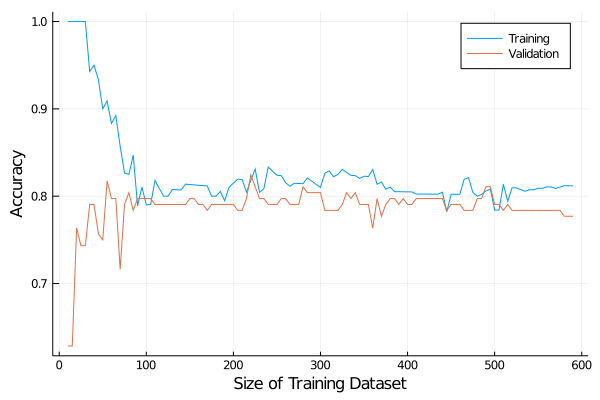

In [65]:
plot(data_schedule, training_losses, label="Training")
plot!(data_schedule, valid_losses, label="Validation")
xlabel!("Size of Training Dataset")
ylabel!("Accuracy")

In [66]:
fn = "Figures/Dataset_size_Boost_nestimators:$(best_n)_lr:$(best_lr)_loss:$(best_loss)"
png(replace(fn,'.' => ','))

# Final Results

In [67]:
final_boost_model = best.best_model

AdaBoostClassifier(
    base_estimator = nothing,
    n_estimators = 5,
    learning_rate = 0.16681005372000587,
    algorithm = "SAMME.R",
    random_state = nothing) @456

In [68]:
Final_Boost = machine(final_boost_model, X_stand, y)

┌ Warning: The scitype of `X`, in `machine(model, X, ...)` is incompatible with `model=AdaBoostClassifier @456`:
│ scitype(X) = Table{Union{AbstractArray{Continuous,1}, AbstractArray{Count,1}}}
│ input_scitype(model) = Table{var"#s44"} where var"#s44"<:(AbstractArray{var"#s13",1} where var"#s13"<:Continuous).
└ @ MLJBase /home/andrew/.julia/packages/MLJBase/uKzAz/src/machines.jl:77


Machine{AdaBoostClassifier} @108 trained 0 times.
  args: 
    1:	Source @250 ⏎ `Table{Union{AbstractArray{Continuous,1}, AbstractArray{Count,1}}}`
    2:	Source @663 ⏎ `AbstractArray{Multiclass{2},1}`


In [69]:
fit!(Final_Boost, rows=train, verbosity=2)

┌ Info: Training Machine{AdaBoostClassifier} @108.
└ @ MLJBase /home/andrew/.julia/packages/MLJBase/uKzAz/src/machines.jl:319


Machine{AdaBoostClassifier} @108 trained 1 time.
  args: 
    1:	Source @250 ⏎ `Table{Union{AbstractArray{Continuous,1}, AbstractArray{Count,1}}}`
    2:	Source @663 ⏎ `AbstractArray{Multiclass{2},1}`


In [70]:
ŷ2 = MLJ.predict(Final_Boost, X_stand[test,:]);

In [71]:
cross_entropy(ŷ2, y[test]) |> mean

0.527541406686384

In [72]:
acc(ŷ2, y[test])

0.7350157728706624

In [73]:
confusion_matrix(mode.(ŷ2), y[test])

┌ Warning: The classes are un-ordered,
│ using: negative='NRB' and positive='RB'.
│ To suppress this warning, consider coercing to OrderedFactor.
└ @ MLJBase /home/andrew/.julia/packages/MLJBase/uKzAz/src/measures/confusion_matrix.jl:83


              ┌───────────────────────────┐
              │       Ground Truth        │
┌─────────────┼─────────────┬─────────────┤
│  Predicted  │     NRB     │     RB      │
├─────────────┼─────────────┼─────────────┤
│     NRB     │     166     │     40      │
├─────────────┼─────────────┼─────────────┤
│     RB      │     44      │     67      │
└─────────────┴─────────────┴─────────────┘
